In [ ]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

data = pd.read_csv("parkinsons_disease_data.csv")

Saving parkinsons_disease_data.csv to parkinsons_disease_data.csv


In [ ]:
# Display basic dataset information
print("Dataset Overview:")
display(data.head())

print("\nDataset Statistics:")
display(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())

# Count of each class in the 'Diagnosis' column
print("\nClass Distribution in Diagnosis:")
class_counts = data["Diagnosis"].value_counts()
print(class_counts)


Dataset Overview:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid



Dataset Statistics:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Missing Values:
PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation           

In [ ]:
# Define Target and Drop Irrelevant Columns
target_column = "Diagnosis"
drop_columns = ["PatientID", "DoctorInCharge", "UPDRS"]
data = data.drop(columns=drop_columns, errors="ignore")

# Handle Missing Values
data.fillna(data.mean(), inplace=True)

# Display Processed Dataset Overview
print("\nDropped Columns:", drop_columns)
print("\nMissing Values After Imputation:")
print(data.isnull().sum())



Dropped Columns: ['PatientID', 'DoctorInCharge', 'UPDRS']

Missing Values After Imputation:
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constip

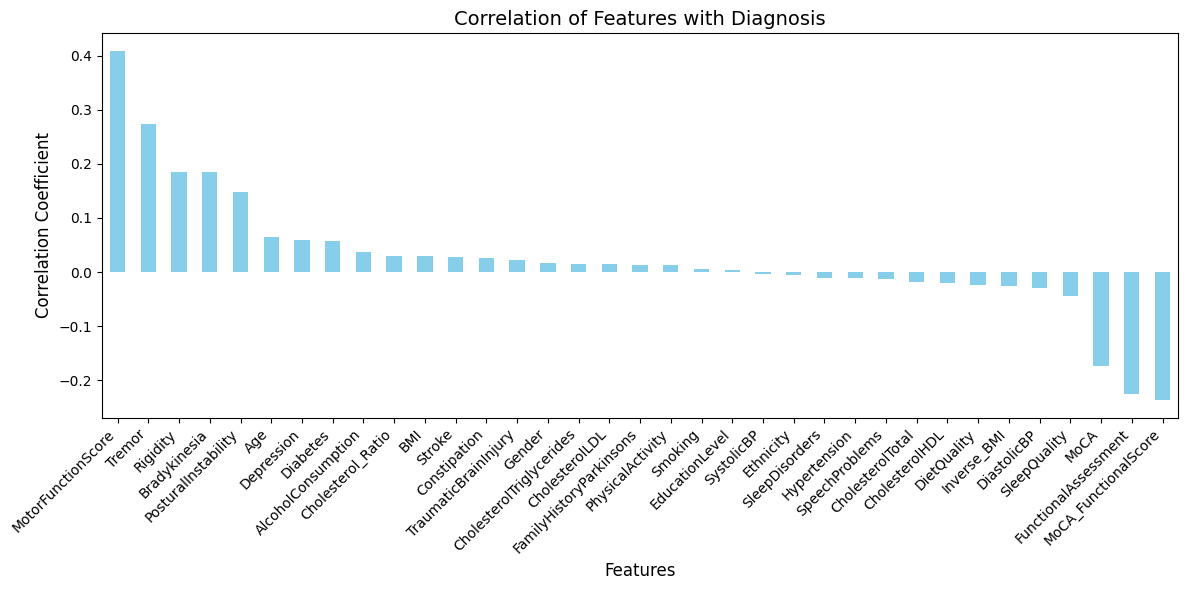

In [ ]:
# Feature Engineering: Create New Features

data["Inverse_BMI"] = 1 / (data["BMI"] + 0.001)
data["Cholesterol_Ratio"] = data["CholesterolLDL"] / (data["CholesterolHDL"] + 1)
data["MotorFunctionScore"] = (data["Tremor"] + data["Rigidity"] + data["Bradykinesia"] + data["PosturalInstability"]) / 4
data["MoCA_FunctionalScore"] = (data["MoCA"] + data["FunctionalAssessment"]) / 2

# Calculate Correlation of Features with Diagnosis
correlation_with_diagnosis = data.corr()["Diagnosis"].sort_values(ascending=False)

# Visualize correlations with Diagnosis
plt.figure(figsize=(12, 6))
correlation_with_diagnosis.drop("Diagnosis").plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Diagnosis', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
# Features and Target
X = data.drop(columns=[target_column])
y = data[target_column]

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Define Baseline Models
baseline_models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}

# Evaluate Baseline Models
baseline_results = []
for name, model in baseline_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    baseline_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A",
    })

# Display Results
baseline_results_df = pd.DataFrame(baseline_results)
print("\nBaseline Model Results:")
display(baseline_results_df)



Baseline Model Results:


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Random Forest,0.812352,0.795455,0.938697,0.861160,0.816846
1,Gradient Boosting,0.793349,0.788079,0.911877,0.845471,0.815278
2,SVM,0.788599,0.790541,0.896552,0.840215,0.809483
3,Logistic Regression,0.757720,0.784946,0.839080,0.811111,0.804598
4,Decision Tree,0.745843,0.783088,0.816092,0.799250,0.723671


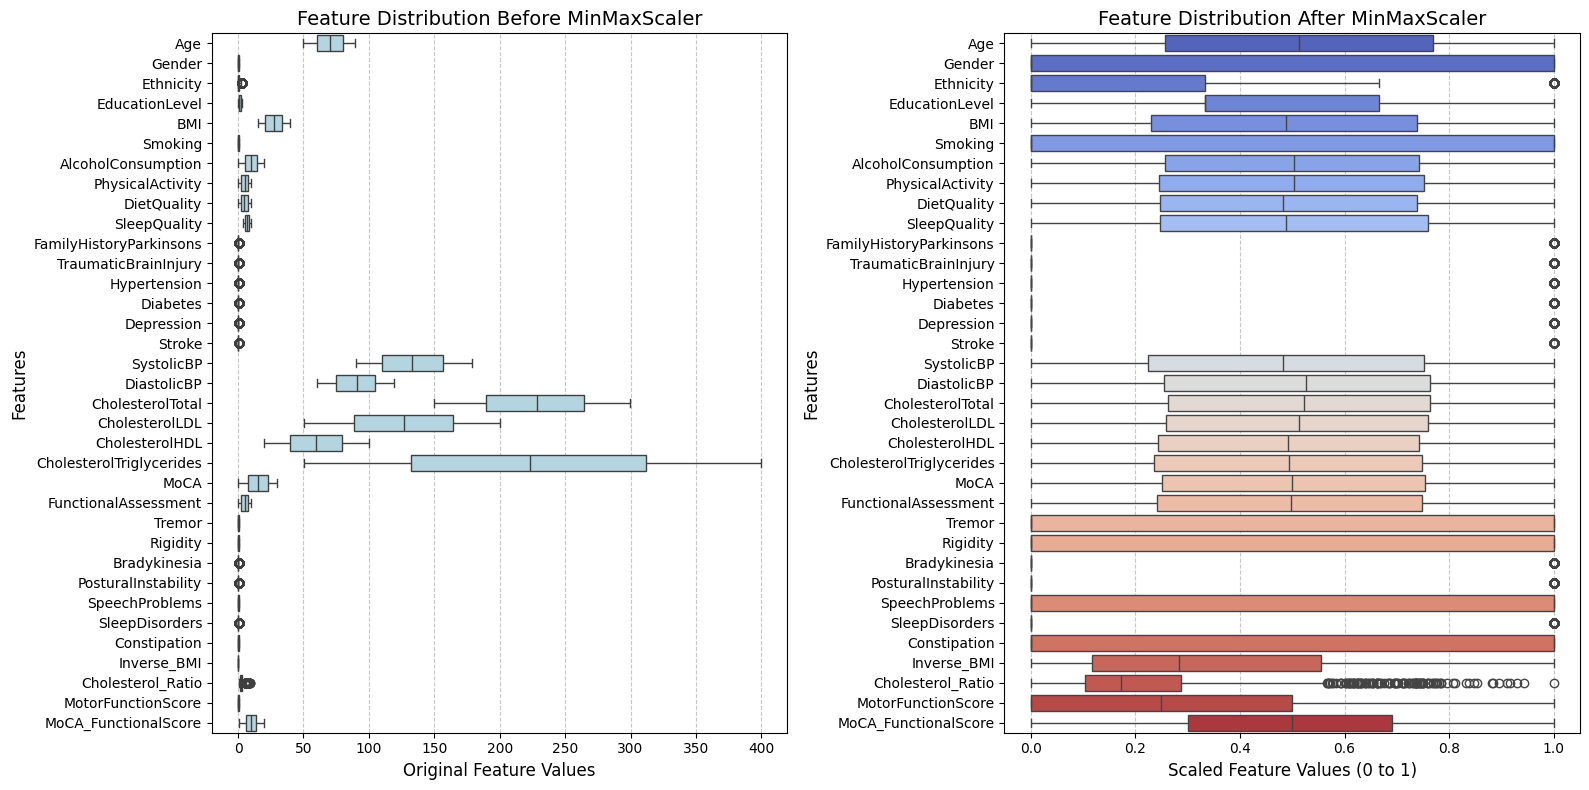

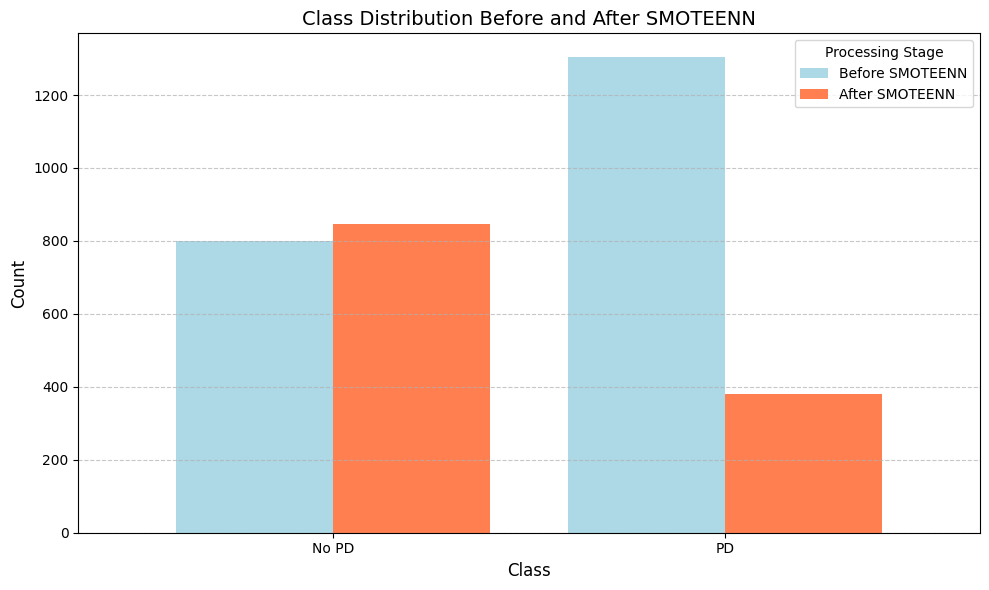

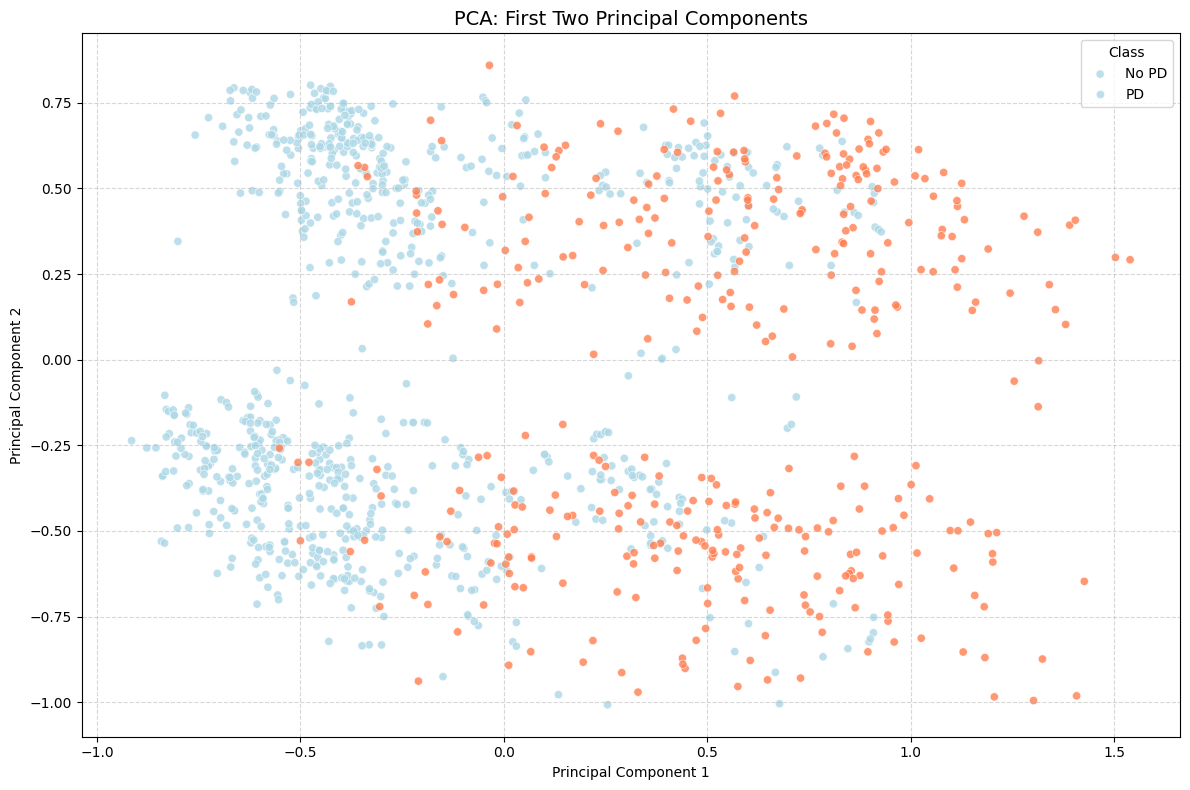

In [ ]:
# Advanced Preprocessing
scaler = MinMaxScaler()
X_scaled_advanced = scaler.fit_transform(X)

# MinMaxScaler Visualization
plt.figure(figsize=(16, 8))

# Before Scaling
plt.subplot(1, 2, 1)
sns.boxplot(data=pd.DataFrame(X, columns=X.columns), orient="h", color="lightblue")
plt.title("Feature Distribution Before MinMaxScaler", fontsize=14)
plt.xlabel("Original Feature Values", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# After Scaling
plt.subplot(1, 2, 2)
sns.boxplot(data=pd.DataFrame(X_scaled_advanced, columns=X.columns), orient="h", palette="coolwarm")
plt.title("Feature Distribution After MinMaxScaler", fontsize=14)
plt.xlabel("Scaled Feature Values (0 to 1)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_scaled_advanced, y)

# SMOTEENN Visualization (Combined)
before_counts = [sum(y == 0), sum(y == 1)]
after_counts = [sum(y_resampled == 0), sum(y_resampled == 1)]

smoteenn_df = pd.DataFrame({
    "Class": ["No PD", "PD"],
    "Before SMOTEENN": before_counts,
    "After SMOTEENN": after_counts
})

smoteenn_df.set_index("Class").plot(
    kind="bar",
    figsize=(10, 6),
    color=["lightblue", "coral"],
    width=0.8
)

plt.title("Class Distribution Before and After SMOTEENN", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Class", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title="Processing Stage", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_resampled)

explained_variance = pca.explained_variance_ratio_
pca_df = pd.DataFrame({
    "PC1": X_reduced[:, 0],
    "PC2": X_reduced[:, 1],
    "Class": y_resampled
})

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="Class",
    palette={0: "lightblue", 1: "coral"},
    alpha=0.8
)
plt.title("PCA: First Two Principal Components", fontsize=14)
plt.xlabel(f"Principal Component 1")
plt.ylabel(f"Principal Component 2")
plt.legend(title="Class", labels=["No PD", "PD"], fontsize=10)
plt.grid(alpha=0.5, linestyle="--")
plt.tight_layout()
plt.show()

# Train-Test Split
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(
    X_reduced, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


In [ ]:
# Define Adjusted Models
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    class_weight="balanced",
)
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42,
)

# Train and Evaluate Adjusted Models
adjusted_results = []
for name, model in {"Random Forest": rf_model, "Gradient Boosting": gb_model}.items():
    model.fit(X_train_adv, y_train_adv)

    # Predictions and probabilities
    y_pred_train = model.predict(X_train_adv)
    y_proba_train = model.predict_proba(X_train_adv)[:, 1]

    y_pred_test = model.predict(X_test_adv)
    y_proba_test = model.predict_proba(X_test_adv)[:, 1]

    '''
    # Append evaluation metrics
    adjusted_results.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train_adv, y_pred_train),
        "Accuracy": accuracy_score(y_test_adv, y_pred_test),
        "Train Precision": precision_score(y_train_adv, y_pred_train),
        "Precision": precision_score(y_test_adv, y_pred_test),
        "Train Recall": recall_score(y_train_adv, y_pred_train),
        "Recall": recall_score(y_test_adv, y_pred_test),
        "Train F1 Score": f1_score(y_train_adv, y_pred_train),
        "F1 Score": f1_score(y_test_adv, y_pred_test),
        "Train ROC-AUC": roc_auc_score(y_train_adv, y_proba_train),
        "ROC-AUC": roc_auc_score(y_test_adv, y_proba_test),
        "Overfit Metric (Accuracy)": accuracy_score(y_train_adv, y_pred_train) - accuracy_score(y_test_adv, y_pred_test),
    })

    '''
    adjusted_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test_adv, y_pred_test),
        "Precision": precision_score(y_test_adv, y_pred_test),
        "Recall": recall_score(y_test_adv, y_pred_test),
        "F1 Score": f1_score(y_test_adv, y_pred_test),
        "ROC-AUC": roc_auc_score(y_test_adv, y_proba_test),
    })


# Display Adjusted Results
adjusted_results_df = pd.DataFrame(adjusted_results)
print("\nResults with Advanced Preprocessing:")
display(adjusted_results_df)



Results with Advanced Preprocessing:


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Random Forest,0.906504,0.827160,0.881579,0.853503,0.969969
1,Gradient Boosting,0.902439,0.919355,0.750000,0.826087,0.962693



Ensemble Model Results:


,Model,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test ROC-AUC
0,Ensemble,0.910569,0.897059,0.802632,0.847222,0.968808


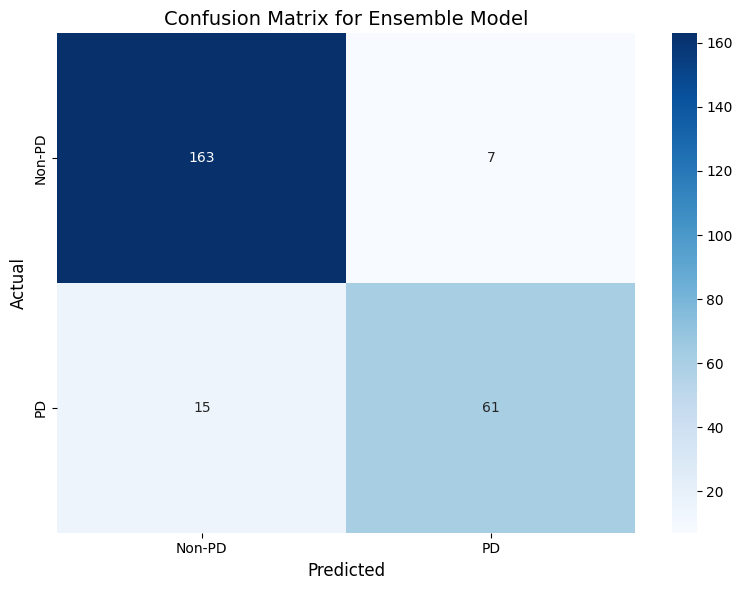

In [ ]:
# Define Weighted Ensemble Model
rf_weight = adjusted_results_df[adjusted_results_df["Model"] == "Random Forest"]["ROC-AUC"].values[0]
gb_weight = adjusted_results_df[adjusted_results_df["Model"] == "Gradient Boosting"]["ROC-AUC"].values[0]

ensemble = VotingClassifier(
    estimators=[("Random Forest", rf_model), ("Gradient Boosting", gb_model)],
    voting="soft",
    weights=[rf_weight, gb_weight],
)

# Train and Evaluate Ensemble Model
ensemble.fit(X_train_adv, y_train_adv)
y_pred_ensemble = ensemble.predict(X_test_adv)
y_proba_ensemble = ensemble.predict_proba(X_test_adv)[:, 1]

# Metrics for Ensemble Model
ensemble_results = {
    "Model": "Ensemble",
    "Test Accuracy": accuracy_score(y_test_adv, y_pred_ensemble),
    "Test Precision": precision_score(y_test_adv, y_pred_ensemble),
    "Test Recall": recall_score(y_test_adv, y_pred_ensemble),
    "Test F1 Score": f1_score(y_test_adv, y_pred_ensemble),
    "Test ROC-AUC": roc_auc_score(y_test_adv, y_proba_ensemble),
}

# Display Ensemble Results
print("\nEnsemble Model Results:")
display(pd.DataFrame([ensemble_results]))

# Generate Confusion Matrix
cm_ensemble = confusion_matrix(y_test_adv, y_pred_ensemble)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-PD", "PD"], yticklabels=["Non-PD", "PD"])
plt.title("Confusion Matrix for Ensemble Model", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.tight_layout()
plt.show()


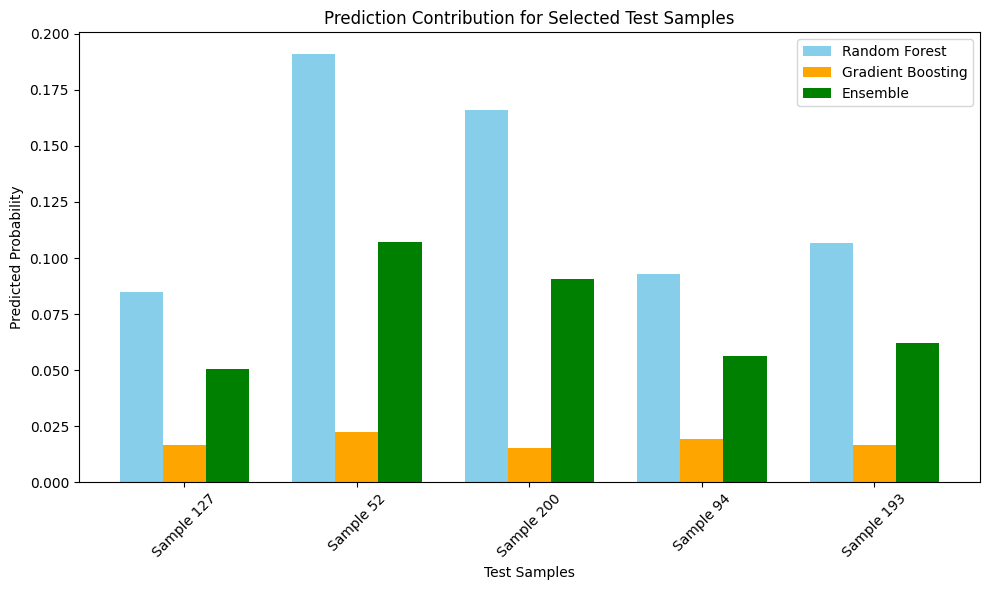

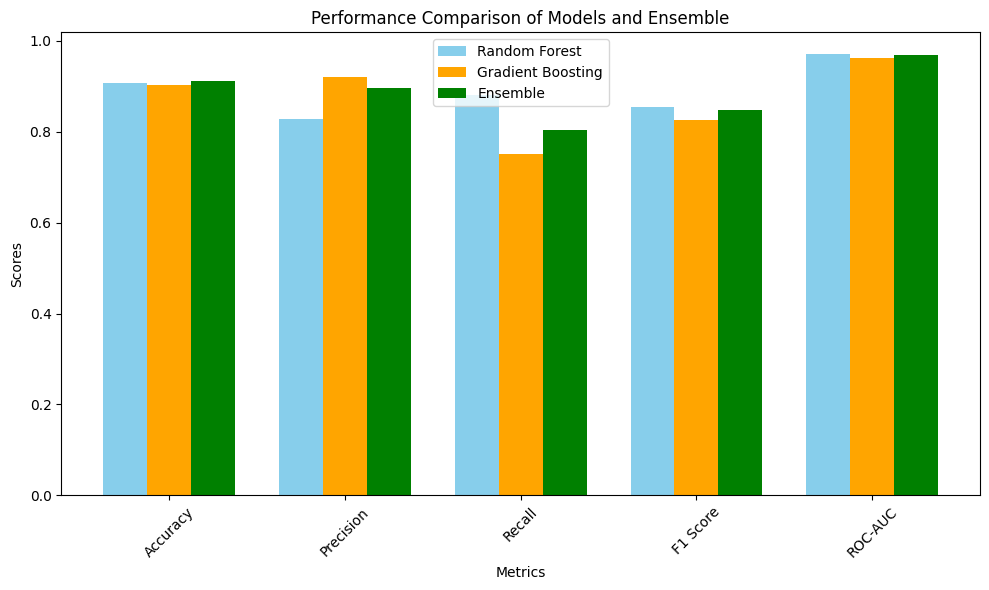

In [ ]:
# Visualization 2: Prediction Contribution for a Few Samples
sample_indices = np.random.choice(len(X_test_adv), 5, replace=False)  # Select 5 random samples
rf_proba = rf_model.predict_proba(X_test_adv[sample_indices])[:, 1]
gb_proba = gb_model.predict_proba(X_test_adv[sample_indices])[:, 1]
ensemble_proba = ensemble.predict_proba(X_test_adv[sample_indices])[:, 1]

plt.figure(figsize=(10, 6))
x = np.arange(len(sample_indices))
bar_width = 0.25

plt.bar(x - bar_width, rf_proba, width=bar_width, color="skyblue", label="Random Forest")
plt.bar(x, gb_proba, width=bar_width, color="orange", label="Gradient Boosting")
plt.bar(x + bar_width, ensemble_proba, width=bar_width, color="green", label="Ensemble")

plt.title("Prediction Contribution for Selected Test Samples")
plt.xlabel("Test Samples")
plt.ylabel("Predicted Probability")
plt.xticks(x, [f"Sample {i}" for i in sample_indices], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Visualization 3: Performance Comparison
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]
rf_metrics = [
    accuracy_score(y_test_adv, rf_model.predict(X_test_adv)),
    precision_score(y_test_adv, rf_model.predict(X_test_adv)),
    recall_score(y_test_adv, rf_model.predict(X_test_adv)),
    f1_score(y_test_adv, rf_model.predict(X_test_adv)),
    roc_auc_score(y_test_adv, rf_model.predict_proba(X_test_adv)[:, 1])
]
gb_metrics = [
    accuracy_score(y_test_adv, gb_model.predict(X_test_adv)),
    precision_score(y_test_adv, gb_model.predict(X_test_adv)),
    recall_score(y_test_adv, gb_model.predict(X_test_adv)),
    f1_score(y_test_adv, gb_model.predict(X_test_adv)),
    roc_auc_score(y_test_adv, gb_model.predict_proba(X_test_adv)[:, 1])
]
ensemble_metrics = [
    ensemble_results["Test Accuracy"],
    ensemble_results["Test Precision"],
    ensemble_results["Test Recall"],
    ensemble_results["Test F1 Score"],
    ensemble_results["Test ROC-AUC"]
]

x = np.arange(len(metrics))
bar_width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, rf_metrics, width=bar_width, color="skyblue", label="Random Forest")
plt.bar(x, gb_metrics, width=bar_width, color="orange", label="Gradient Boosting")
plt.bar(x + bar_width, ensemble_metrics, width=bar_width, color="green", label="Ensemble")

plt.title("Performance Comparison of Models and Ensemble")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.xticks(x, metrics, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


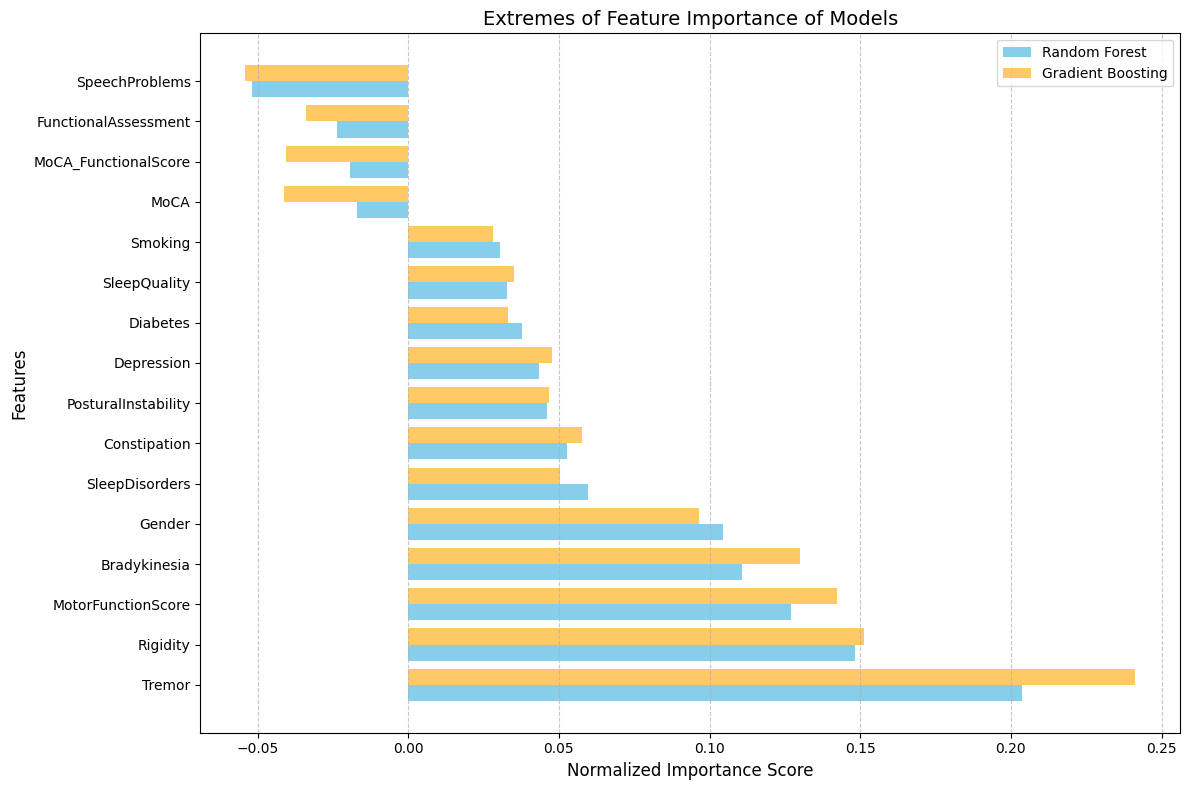

In [ ]:
# Map PCA Components Back to Original Features
pca_components_matrix = pca.components_  # PCA components matrix
original_feature_names = X.columns  # Original feature names

# Calculate contributions of original features to each principal component
pca_feature_contributions = pd.DataFrame(
    pca_components_matrix.T,  # Transpose for mapping
    index=original_feature_names,
    columns=[f"PC{i+1}" for i in range(pca_components_matrix.shape[0])]
)

# Aggregate feature importances back to the original features
rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_

# Map importance scores back to original features
original_feature_importance_rf = np.dot(pca_feature_contributions, rf_importances)
original_feature_importance_gb = np.dot(pca_feature_contributions, gb_importances)

# Normalize feature importance scores
original_feature_importance_rf /= np.sum(original_feature_importance_rf)
original_feature_importance_gb /= np.sum(original_feature_importance_gb)

# Create DataFrame for Visualization
feature_importance_df = pd.DataFrame({
    "Feature": original_feature_names,
    "Random Forest Importance": original_feature_importance_rf,
    "Gradient Boosting Importance": original_feature_importance_gb
}).sort_values(by="Random Forest Importance", ascending=False)

# Filter Features for Extreme Contributions (Outside [-0.025, 0.03])
extreme_feature_importance_df = feature_importance_df.loc[
    (feature_importance_df["Random Forest Importance"] <= -0.025) |
    (feature_importance_df["Random Forest Importance"] >= 0.03) |
    (feature_importance_df["Gradient Boosting Importance"] <= -0.025) |
    (feature_importance_df["Gradient Boosting Importance"] >= 0.03)
]

# Plot Extreme Feature Importance for Original Features
plt.figure(figsize=(12, 8))
bar_width = 0.4
x_indices = np.arange(len(extreme_feature_importance_df))

plt.barh(x_indices - bar_width / 2, extreme_feature_importance_df["Random Forest Importance"], height=bar_width, color="skyblue", label="Random Forest")
plt.barh(x_indices + bar_width / 2, extreme_feature_importance_df["Gradient Boosting Importance"], height=bar_width, color="orange", alpha=0.6, label="Gradient Boosting")

plt.yticks(x_indices, extreme_feature_importance_df["Feature"], fontsize=10)
plt.title("Extremes of Feature Importance of Models", fontsize=14)
plt.xlabel("Normalized Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
